In [1]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Loads Mnist Dataset

# Scaling the Pixel values from 0 to 1
x_train = x_train/255.0  
x_test = x_test/255.0 

In [3]:
# ENCODER 
encoder_input = Input(shape=(28, 28, 1), name='img')   # It is a 28*28 image which means 784 features in Grayscale
x = keras.layers.Flatten()(encoder_input)
layer_3 = Dense(512, activation="relu")(x)
layer_2 = Dense(256, activation="relu")(layer_3)
layer_1 = Dense(128, activation="relu")(layer_2)
layer_4 = Dense(64, activation="relu")(layer_1)
layer_5 = Dense(32, activation="relu")(layer_4)
encoder_output = Dense(8, activation="relu")(layer_5)

encoder = keras.Model(encoder_input, encoder_output)
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080  

In [4]:
# DECODER
decoder_input = Input(shape=(8,), name="pred")
x = Dense(32, activation="relu")(decoder_input)
layer_5 = Dense(64, activation="relu")(x)
layer_4 = Dense(128, activation="relu")(layer_5)
layer_1 = Dense(256, activation="relu")(layer_4)
layer_2 = Dense(512, activation="relu")(layer_1)
layer_3 = Dense(784, activation="sigmoid")(layer_2)
decoder_output = keras.layers.Reshape((28, 28, 1))(layer_3)

decoder = keras.Model(decoder_input, decoder_output)
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
pred (InputLayer)            [(None, 8)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_11 (Dense)             (None, 784)               4021

In [5]:
auto_input = Input(shape=(28,28,1))
encoded = encoder(auto_input)
decoded = decoder(encoded)

autoencoder = keras.Model(auto_input, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
model (Functional)           (None, 8)                 576744    
_________________________________________________________________
model_1 (Functional)         (None, 28, 28, 1)         577520    
Total params: 1,154,264
Trainable params: 1,154,264
Non-trainable params: 0
_________________________________________________________________


In [6]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
autoencoder.compile(opt, loss='mse')

In [7]:
autoencoder.fit(x_train, x_train, batch_size= 64, epochs = 100, verbose = 1)

Epoch 1/100
938/938 [==============================] - 15s 15ms/step - loss: 0.0699
Epoch 2/100
938/938 [==============================] - 15s 16ms/step - loss: 0.0453
Epoch 3/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0388
Epoch 4/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0346
Epoch 5/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0322
Epoch 6/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0309
Epoch 7/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0299
Epoch 8/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0292
Epoch 9/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0285
Epoch 10/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0280
Epoch 11/100
938/938 [==============================] - 16s 17ms/step - loss: 0.0276
Epoch 12/100
938/938 [==============================] - 16s 17ms/step - lo

In [8]:
pred = encoder.predict(x_test)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
kmeans = KMeans(10)
kmeans.fit(pred)
labels = kmeans.labels_

In [11]:
labels

array([6, 9, 2, ..., 1, 3, 7])

In [12]:
unique, counts = np.unique(labels, return_counts=True)
counts

array([ 836, 1472,  715,  822, 1733,  464, 1322,  791,  557, 1288],
      dtype=int64)

In [13]:
u = decoder.predict(pred)

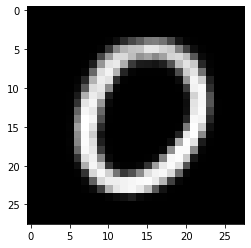

In [14]:
plt.imshow(u[10].reshape(28,28), cmap="gray")

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9' ]
print(classification_report(y_test, labels, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.71      0.77       980
     class 1       0.06      0.08      0.07      1135
     class 2       0.02      0.02      0.02      1032
     class 3       0.00      0.00      0.00      1010
     class 4       0.01      0.01      0.01       982
     class 5       0.00      0.00      0.00       892
     class 6       0.00      0.00      0.00       958
     class 7       0.00      0.00      0.00      1028
     class 8       0.00      0.00      0.00       974
     class 9       0.01      0.01      0.01      1009

    accuracy                           0.08     10000
   macro avg       0.09      0.08      0.09     10000
weighted avg       0.09      0.08      0.09     10000



0

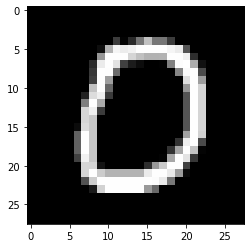

In [17]:
plt.imshow(x_test[10], cmap="gray")
labels[10]

0

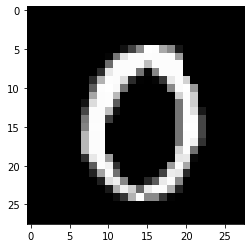

In [18]:
plt.imshow(x_test[13], cmap="gray")
labels[13]

3

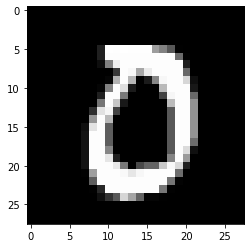

In [19]:
plt.imshow(x_test[28], cmap="gray")
labels[28]

1

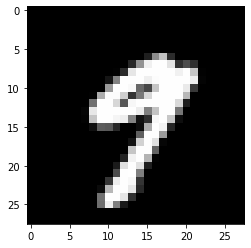

In [20]:
plt.imshow(x_test[20], cmap="gray")
labels[20]

1

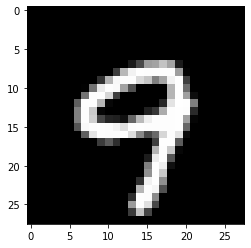

In [21]:
plt.imshow(x_test[58], cmap="gray")
labels[58]

7

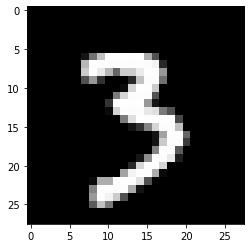

In [22]:
plt.imshow(x_test[30], cmap="gray")
labels[30]

9

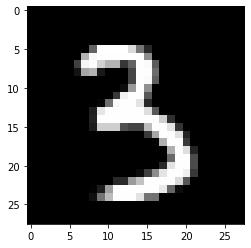

In [23]:
plt.imshow(x_test[32], cmap="gray")
labels[32]

5

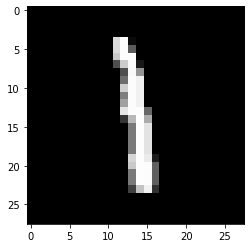

In [24]:
plt.imshow(x_test[29], cmap="gray")
labels[29]

5

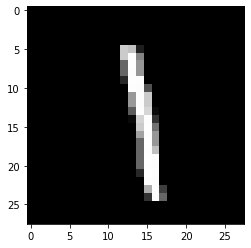

In [25]:
plt.imshow(x_test[31], cmap="gray")
labels[31]

6

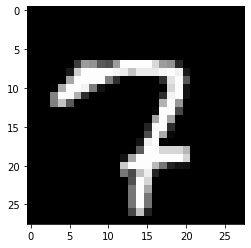

In [26]:
plt.imshow(x_test[36], cmap="gray")
labels[36]

6

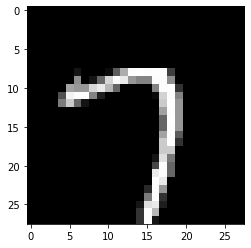

In [27]:
plt.imshow(x_test[26], cmap="gray")
labels[26]

6

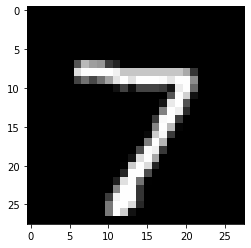

In [28]:
plt.imshow(x_test[0], cmap="gray")
labels[0]

6

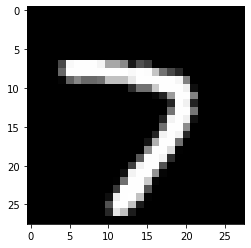

In [29]:
plt.imshow(x_test[17], cmap="gray")
labels[17]

In [30]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)

In [31]:
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.586485,-11.174593,6
1,10.205937,-10.242640,9
2,53.210487,-19.159336,2
3,-46.252666,5.941660,0
4,5.023818,12.998072,1


Text(0, 0.5, 'pca2')

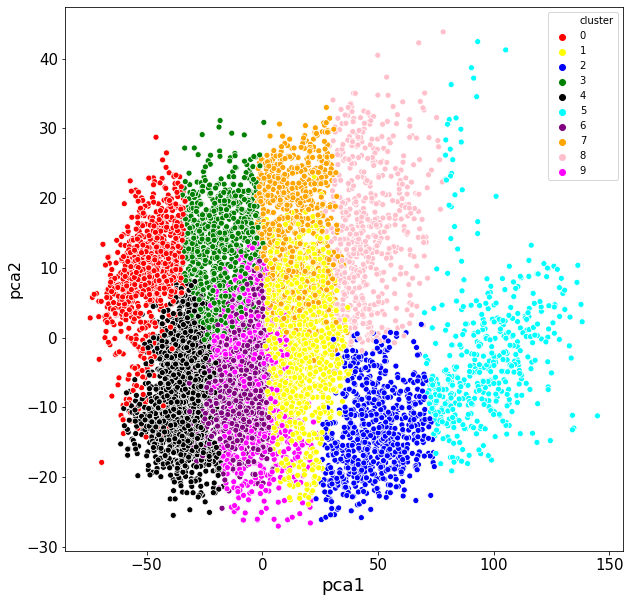

In [32]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red','yellow','blue','green','black','cyan','purple','orange','pink','magenta'  ], )
ax.tick_params(axis='both', which='major', labelsize = 15)
plt.xlabel('pca1', fontsize=18)
plt.ylabel('pca2', fontsize=16)

In [50]:
pca_df.shape
pca_df.head()

,pca1,pca2,cluster
0,-1.586485,-11.174593,6
1,10.205937,-10.242640,9
2,53.210487,-19.159336,2
3,-46.252666,5.941660,0
4,5.023818,12.998072,1


In [33]:
def plot(n):
    plt.imshow(x_test[n], cmap="gray")
    print(labels[n])

6


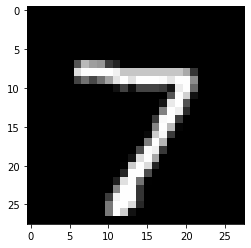

In [34]:
plot(0)

In [37]:
labels

array([6, 9, 2, ..., 1, 3, 7])

In [38]:
# target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9' ]
# print(classification_report(y_test, labels, target_names=target_names))

In [39]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [40]:
labels

array([6, 9, 2, ..., 1, 3, 7])

In [41]:
# from sklearn import metrics
# confusion_matrix = metrics.confusion_matrix(y_test, labels)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = True)
# cm_display.plot()
# plt.show()

In [42]:
np.sum(y_test==labels)

824

In [43]:
np.sum(y_test==7)

1028

In [44]:
len(y_test)

10000